In [1]:
%load_ext autoreload
%autoreload 2

from rcwa import Source, Layer, LayerStack, Crystal, Solver, RectangularGrating
from rcwa.shorthand import complexArray
import numpy as np
import matplotlib.pyplot as plt

In [47]:
reflection_layer = Layer(er=1.0, ur=1.0)
transmission_layer = Layer(er=9.0, ur=1.0)

wavelength = 0.5
deg = np.pi / 180
k0 = 2*np.pi/wavelength
theta = 45 * deg
phi = 0*deg
# pTEM = 1/np.sqrt(2)*complexArray([1,1j])
pTEM = complexArray([1, 0])
source = Source(wavelength=wavelength, theta=theta, phi=phi, pTEM=pTEM, layer=reflection_layer)

crystal_thickness = 0.5

N_harmonics = 11

period = 2
grating_layer = RectangularGrating(period=period, thickness=0.5, n=4, n_void=1, nx=500)
layer_stack = LayerStack(grating_layer, incident_layer=reflection_layer, transmission_layer=transmission_layer)

solver_1d = Solver(layer_stack, source, N_harmonics)
results = solver_1d.solve()

1/1 |############################################################|Time: 0:00:00


In [48]:
source.k_incident

array([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j])

In [43]:
print("The x-components of the harmonics of k in free space should be:")
for i in range(-5, 6):
    print(source.k_incident[0] + i*(2*np.pi/period)/k0)

The x-components of the harmonics of k in free space should be:
(-0.5428932188134525+0j)
(-0.29289321881345254+0j)
(-0.04289321881345254+0j)
(0.20710678118654746+0j)
(0.45710678118654746+0j)
(0.7071067811865475+0j)
(0.9571067811865475+0j)
(1.2071067811865475+0j)
(1.4571067811865475+0j)
(1.7071067811865475+0j)
(1.9571067811865475+0j)


In [22]:
from rcwa.shorthand import *

In [23]:
matrixSize = np.prod(solver_1d.n_harmonics)
matrixShape = (matrixSize, matrixSize)
KMatrix = complexZeros(matrixShape)
T1 = solver_1d.base_crystal.reciprocal_lattice_vectors[0]

In [45]:
T1

array([3.14159265, 0.        ])

In [26]:
from rcwa.harmonics import x_components, min_harmonic, max_harmonic

In [27]:
(incidentWaveVectorxy, T1xy) = x_components(source.k_incident, T1)

minHarmonicT1 = min_harmonic(solver_1d.n_harmonics)
maxHarmonicT1 = max_harmonic(solver_1d.n_harmonics)

In [28]:
incidentWaveVectorxy

np.complex128(0.7071067811865475+0j)

In [29]:
T1xy

np.float64(3.141592653589793)

In [44]:
diagonalIndex = 0
for desiredHarmonicT1 in range(minHarmonicT1, maxHarmonicT1 + 1):
        print(incidentWaveVectorxy - desiredHarmonicT1*T1xy)
        KMatrix[diagonalIndex][diagonalIndex] = incidentWaveVectorxy - desiredHarmonicT1*T1xy
        diagonalIndex += 1

(16.41507004913551+0j)
(13.27347739554572+0j)
(10.131884741955927+0j)
(6.990292088366134+0j)
(3.8486994347763406+0j)
(0.7071067811865475+0j)
(-2.4344858724032457+0j)
(-5.576078525993038+0j)
(-8.717671179582831+0j)
(-11.859263833172625+0j)
(-15.000856486762418+0j)


/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


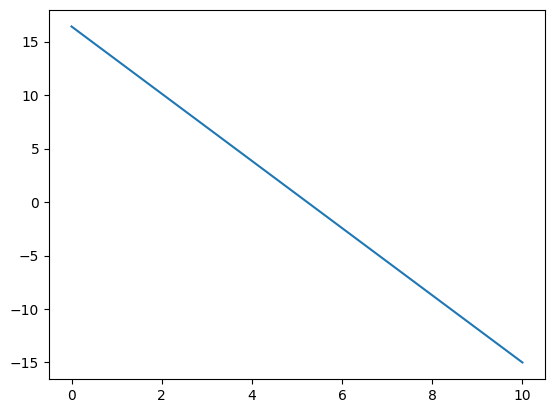

In [37]:
plt.plot(np.diag(KMatrix))

In [6]:
print(f"The grating's lattice vectors: {grating_layer.lattice_vector}")

The grating's lattice vectors: [2 0]


# Plotting the Kx, Ky matrices

Text(0, 0.5, 'm')

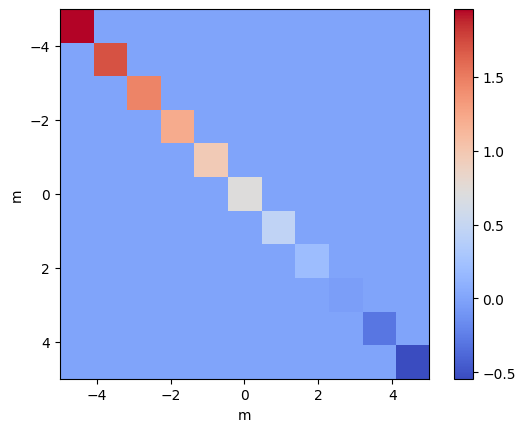

In [49]:
plt.imshow(np.real(solver_1d.Kx), cmap=plt.get_cmap("coolwarm"), extent=(-5, 5, 5, -5))
plt.colorbar()
plt.xlabel("m")
plt.ylabel("m")

In [50]:
kx_normalized = np.diag(solver_1d.Kx)

Text(0, 0.5, '$k_{x, m}$')

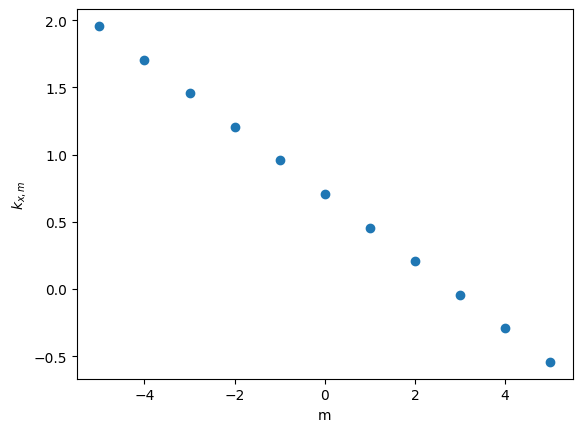

In [52]:
plt.scatter(np.arange(-5, 6), kx_normalized)
plt.xlabel("m")
plt.ylabel(r"$k_{x, m}$")

In [13]:
np.sin(theta)

np.float64(0.7071067811865475)

In [11]:
kx_normalized/k0

array([ 1.30626977+0.j,  1.05626977+0.j,  0.80626977+0.j,  0.55626977+0.j,
        0.30626977+0.j,  0.05626977+0.j, -0.19373023+0.j, -0.44373023+0.j,
       -0.69373023+0.j, -0.94373023+0.j, -1.19373023+0.j])

In [19]:
solver_1d.base_crystal.dimensions

1

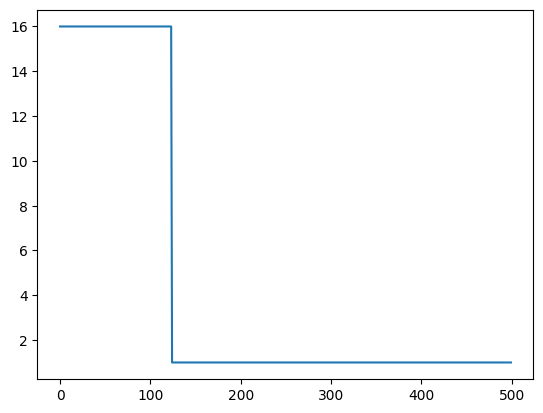

In [17]:
plt.plot(solver_1d.base_crystal.permittivityCellData)

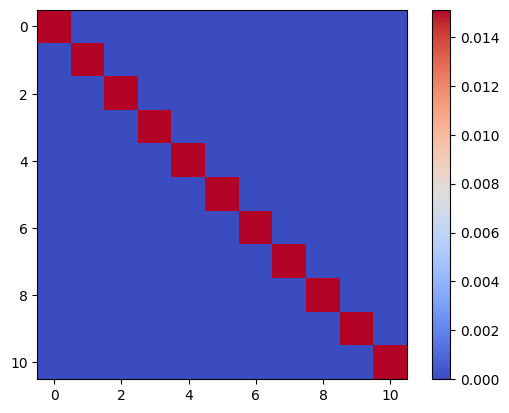

In [10]:
plt.imshow(np.real(solver_1d.Ky), cmap=plt.get_cmap("coolwarm"))
plt.colorbar()

In [66]:
ky_normalized = np.diag(solver_1d.Ky)

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$k_{y, n}$')

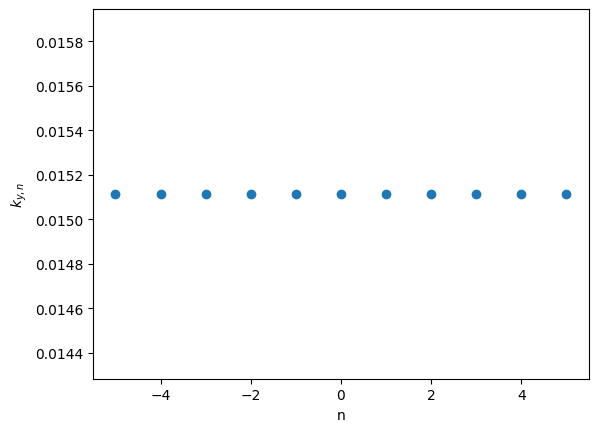

In [67]:
plt.scatter(np.arange(-5, 6), ky_normalized)
plt.xlabel("n")
plt.ylabel(r"$k_{y, n}$")

Since our grating is only defined in 1D in the x direction, it makes sense for there to be only 1 $k_y$ component.

# Visualizing the S-matrix

| Component of the S-matrix | Meaning |
|---|---|
| `S[0, 0]` | Reflection | 
| `S[1, 0]` | Transmission | 


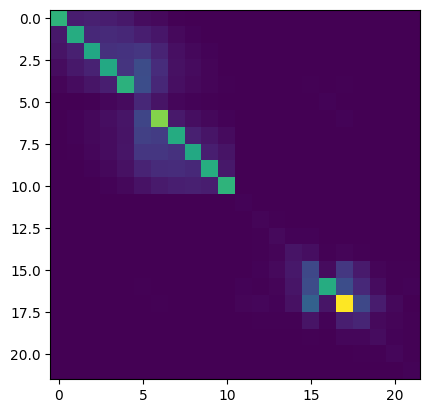

In [43]:
plt.imshow(np.abs(solver_1d.SGlobal[0, 0]))

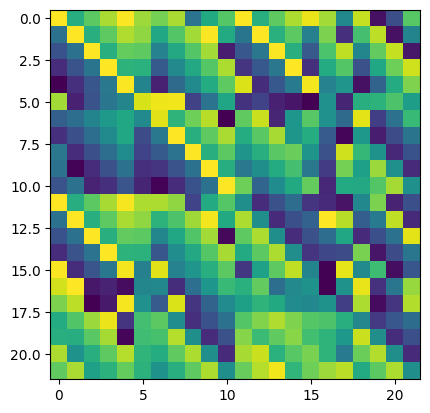

In [14]:
plt.imshow(np.angle(solver_1d.SGlobal[0, 0]))

def s_incident(source, n_harmonics: Union[int, ArrayLike]):
    totalNumberHarmonics = np.prod(n_harmonics)
    return np.hstack((source.pX * kroneckerDeltaVector(totalNumberHarmonics),
            source.pY * kroneckerDeltaVector(totalNumberHarmonics)))


In [17]:
from rcwa.solver import s_incident

In [ ]:
incidentFieldHarmonics = s_incident(solver_1d.source, solver_1d.n_harmonics)
ReflectionRegionHarmonicsCoefficients = np.linalg.inv(solver_1d.WReflectionRegion) @ incidentFieldHarmonics
ReflectedHarmonicsCoefficients = solver_1d.SGlobal[0, 0] @ ReflectionRegionHarmonicsCoefficients

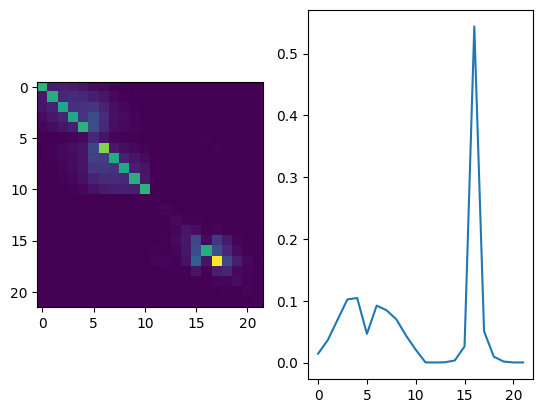

In [54]:
plt.subplot(121)
plt.imshow(np.abs(solver_1d.SGlobal[0, 0]))
plt.subplot(122)
plt.plot(np.abs(ReflectedHarmonicsCoefficients))

# Angular spectrum decomposition of the reflected waves $A(k_x, k_y)$

In [ ]:
maxIndex = int(len(ReflectedHarmonicsCoefficients)/2)

ReflectedHarmonicsCmplxAmp_X = ReflectedHarmonicsCoefficients[0:maxIndex]
ReflectedHarmonicsCmplxAmp_Y = ReflectedHarmonicsCoefficients[maxIndex:]

Text(0, 0.5, '$Phase(E_x)$')

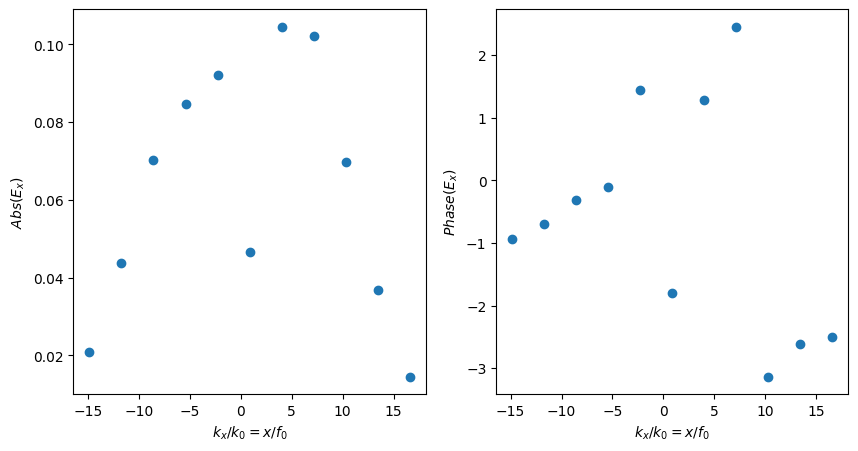

In [83]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(ReflectedHarmonicsCmplxAmp_X))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_x)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(ReflectedHarmonicsCmplxAmp_X))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_x)$")

Text(0, 0.5, '$Phase(E_y)$')

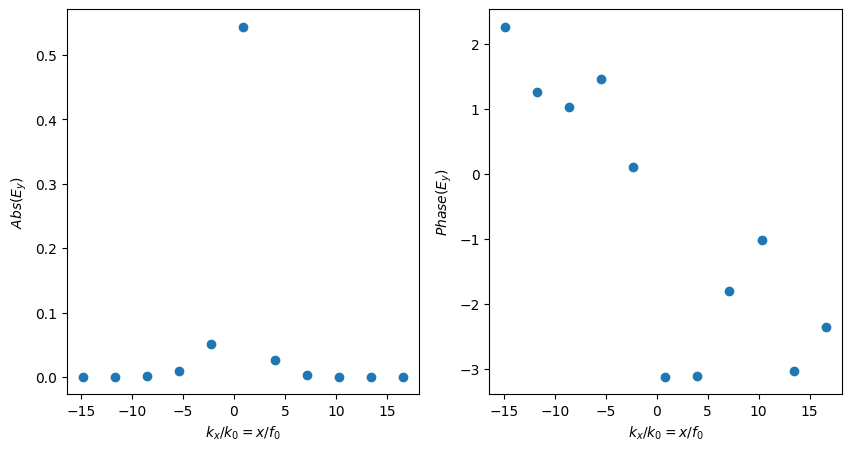

In [79]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(ReflectedHarmonicsCmplxAmp_Y))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_y)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(ReflectedHarmonicsCmplxAmp_Y))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_y)$")

In [81]:
ReflectedHarmonicsCmplxAmp_Z = - np.linalg.inv(solver_1d.KzReflectionRegion) @ (solver_1d.Kx @ ReflectedHarmonicsCmplxAmp_X + solver_1d.Ky @ ReflectedHarmonicsCmplxAmp_Y)

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$Phase(E_z)$')

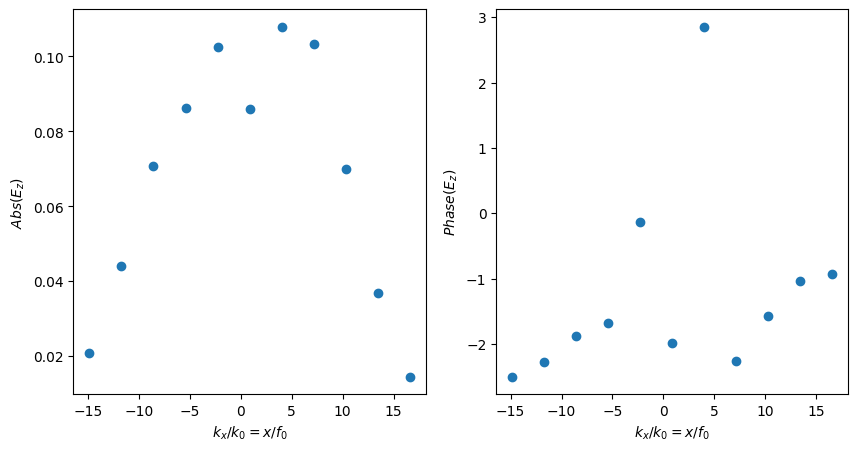

In [82]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(ReflectedHarmonicsCmplxAmp_Z))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_z)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(ReflectedHarmonicsCmplxAmp_Z))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_z)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


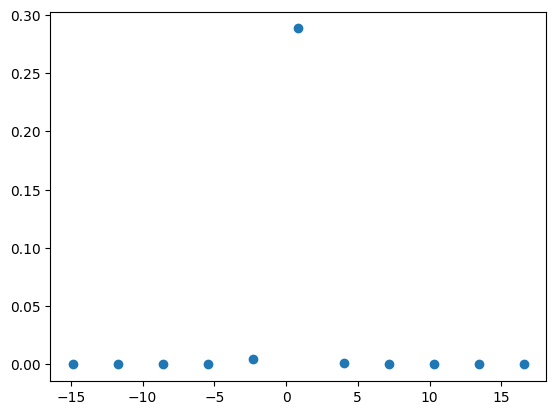

In [84]:
ReflectedHarmonicsIntensity = np.square(ReflectedHarmonicsCmplxAmp_X) + np.square(ReflectedHarmonicsCmplxAmp_Y) + + np.square(ReflectedHarmonicsCmplxAmp_Z)
plt.scatter(kx_normalized, ReflectedHarmonicsIntensity)

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


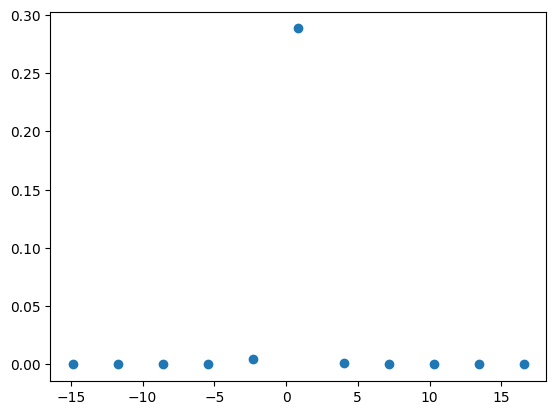

In [87]:
plt.scatter(kx_normalized, np.square(solver_1d.rx) + np.square(solver_1d.ry) + np.square(solver_1d.rz))

In [ ]:
def transmittedElectricComponents_1D():
    incidentFieldHarmonics = s_incident(solver_1d.source, solver_1d.n_harmonics)
    TransmittedRegionHarmonicsCoefficients = np.linalg.inv(solver_1d.WTransmissionRegion) @ incidentFieldHarmonics
    THarmonicsCoefficients = solver_1d.SGlobal[1, 0] @ TransmittedRegionHarmonicsCoefficients

    maxIndex = int(len(ReflectedHarmonicsCoefficients)/2)

    ReflectedHarmonicsCmplxAmp_X = ReflectedHarmonicsCoefficients[0:maxIndex]
    ReflectedHarmonicsCmplxAmp_Y = ReflectedHarmonicsCoefficients[maxIndex:]

    ReflectedHarmonicsCmplxAmp_Z = - np.linalg.inv(solver_1d.KzReflectionRegion) @ (solver_1d.Kx @ ReflectedHarmonicsCmplxAmp_X + solver_1d.Ky @ ReflectedHarmonicsCmplxAmp_Y)

    return ReflectedHarmonicsCmplxAmp_X, ReflectedHarmonicsCmplxAmp_Y, ReflectedHarmonicsCmplxAmp_Z

In [89]:
solver_1d.fields(component='Ex', layer=layer_stack.incident_layer)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [4]:
reflectedEx, reflectedEy, reflectedEz = solver_1d.reflectedElectricComponents_1D()

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Phase$(E_x)$')

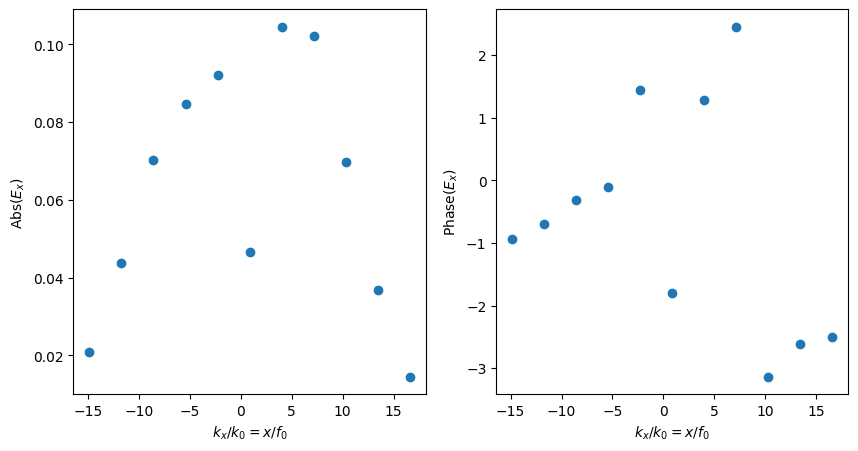

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEx))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Abs$(E_x)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEx))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Phase$(E_x)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Phase$(E_z)$')

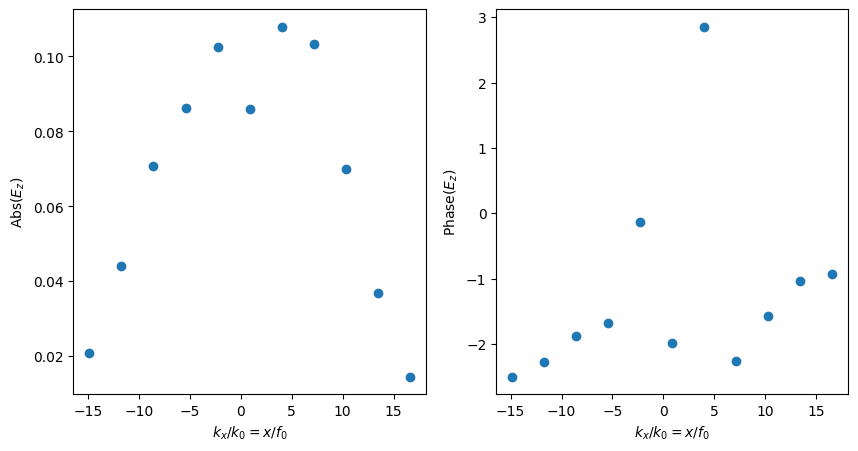

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Abs$(E_z)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Phase$(E_z)$")

# How is the rectangular grating defined?

In [ ]:
def _er_data_single(self, val1: float, val2: float, Nx: int, switch_fraction: float) -> ArrayLike:
        positions = np.linspace(1/Nx, 1, Nx)
        void_positions = positions <= switch_fraction
        return (val1 - val2) * void_positions + val2

In [12]:
Nx = 500
period = 2
groove_width = 0.5
groove_fraction = groove_width / period

In [19]:
n = 4
n_void = 1
er = np.square(n)
er_void = np.square(n_void)

offset = 0.2

In [21]:
positions = np.linspace(1/Nx, 1, Nx)
void_positions = np.logical_and(offset <= positions, positions <= groove_fraction + offset)
val1 = er_void 
val2 = er

In [69]:
er_void

np.int64(1)

In [70]:
er

np.int64(16)

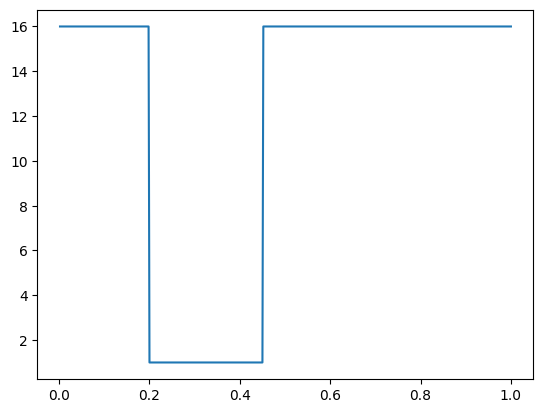

In [22]:
plt.plot(positions, (val1 - val2) * void_positions + val2)

In [ ]:
t = layer_stack.all_layers[0].thickness
if t == 0:
    t = 0.1

t_tot += t

Nz = t_tot*Nx
x_arr = np.linspace(1/Nx, 1, Nx)
z_arr = np.linspace(1/Nz, 1, Nz)

X, Z = np.meshgrid(x_arr, z_arr)

if l.homogenous:
    er_matrix = np.ones((int(Nz*t/t_tot), Nx))*l.er
    ur_matrix = np.ones((int(Nz*t/t_tot), Nx))*l.er

else:
    er_matrix = l.er
    ur_matrix = l.er

    

0.0

In [40]:
Nx

500

In [42]:
z_tot = 0
for l in layer_stack.all_layers:
    
    z = l.thickness
    if z == 0:
        z = 0.1

    z_tot += z

In [43]:
z_tot

0.7

In [20]:
Nx=500

In [21]:
Nz = layer_stack.total_thickness*Nx
Nz

270.0

In [23]:
z_tot = layer_stack.total_thickness

In [39]:
er_matrix_global = np.empty((0, Nx))
ur_matrix_global = np.empty((0, Nx))

for l in layer_stack.all_layers:
    z = l.thickness
    if z == 0:
        z = 0.02
    if l.homogenous:
        er_matrix = np.ones((int(Nz*z/z_tot), Nx))*l.er
        ur_matrix = np.ones((int(Nz*z/z_tot), Nx))*l.ur
    else:
        er_matrix = np.broadcast_to(l.crystal.permittivityCellData[np.newaxis, :], (round(Nz*z/z_tot), Nx))
        ur_matrix = np.broadcast_to(l.crystal.permeabilityCellData[np.newaxis, :], (round(Nz*z/z_tot), Nx))

    er_matrix_global = np.concatenate((er_matrix_global, er_matrix), axis=0)
    ur_matrix_global = np.concatenate((ur_matrix_global, ur_matrix), axis=0)

In [53]:
np.concatenate((np.empty((0, 100)), er_matrix), axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 100 and the array at index 1 has size 500

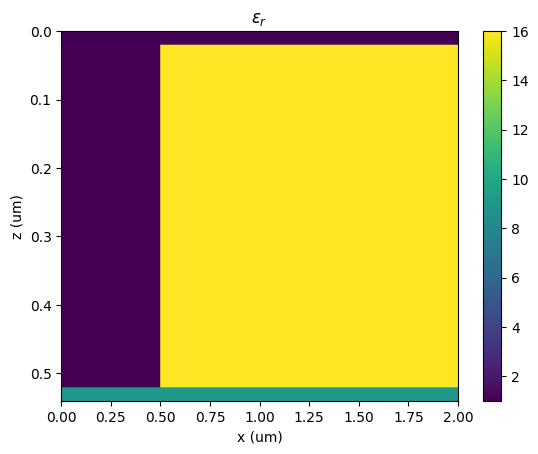

In [58]:
er_matrix_global, _ = layer_stack.er_ur_geometry(Nx)
plt.imshow(er_matrix_global, 
           aspect="auto", 
           extent=(0, period, layer_stack.total_thickness, 0))
plt.xlabel("x (um)")
plt.ylabel("z (um)")
plt.title(r"$\varepsilon_r$")
plt.colorbar()

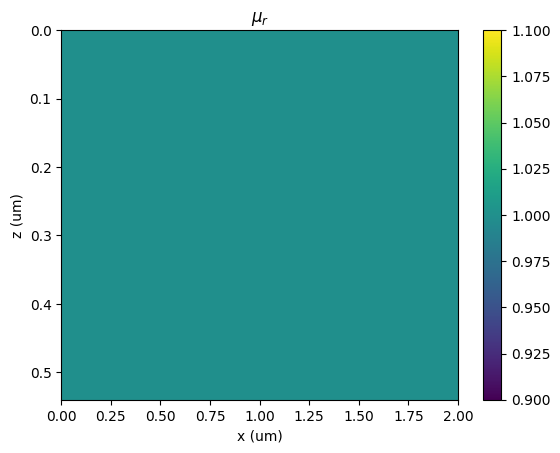

In [60]:
_, ur_matrix_global = layer_stack.er_ur_geometry(Nx)
plt.imshow(ur_matrix_global, 
           aspect="auto", 
           extent=(0, period, layer_stack.total_thickness, 0))
plt.xlabel("x (um)")
plt.ylabel("z (um)")
plt.title(r"$\mu_r$")
plt.colorbar()

In [12]:
layer_stack.all_layers[1].crystal.permittivityCellData

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16

In [8]:
layer_stack.all_layers[1].material.er

array([[ 1.22500000e+01+0.00000000e+00j, -2.40229273e+00-2.37229273e+00j,
        -3.00000000e-02-2.38719848e+00j,  7.80680465e-01-8.10680465e-01j,
         2.05298986e-16+1.41414852e-16j, -4.92307739e-01-4.62307739e-01j,
        -3.00000000e-02-7.95397689e-01j,  3.25826367e-01-3.55826367e-01j,
         2.39679973e-17+6.28317822e-17j, -2.79975435e-01-2.49975435e-01j,
        -3.00000000e-02-4.76836345e-01j],
       [-2.40229273e+00+2.37229273e+00j,  1.22500000e+01+0.00000000e+00j,
        -2.40229273e+00-2.37229273e+00j, -3.00000000e-02-2.38719848e+00j,
         7.80680465e-01-8.10680465e-01j,  2.05298986e-16+1.41414852e-16j,
        -4.92307739e-01-4.62307739e-01j, -3.00000000e-02-7.95397689e-01j,
         3.25826367e-01-3.55826367e-01j,  2.39679973e-17+6.28317822e-17j,
        -2.79975435e-01-2.49975435e-01j],
       [-3.00000000e-02+2.38719848e+00j, -2.40229273e+00+2.37229273e+00j,
         1.22500000e+01+0.00000000e+00j, -2.40229273e+00-2.37229273e+00j,
        -3.00000000e-02-2.38

In [32]:
isinstance(layer_stack.all_layers[0], Grating)

NameError: name 'Grating' is not defined

(<Figure size 640x480 with 1 Axes>, <Axes: >)

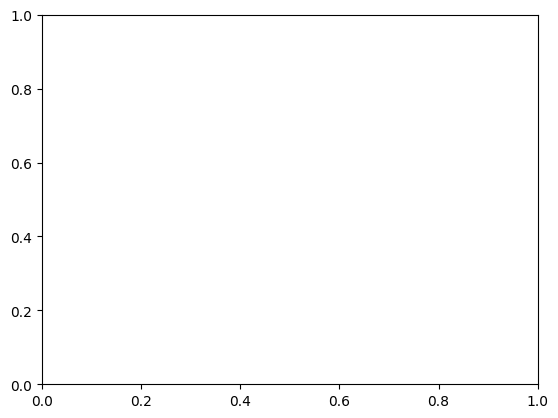

In [25]:
layer_stack.plot()